# 11-Projeto-11-Transfer-learning-usando-o-mobilenet

* Neste projeto iremos usar uma rede neural pré-treinada chamada MobileNet
* Utilizaremos a base de dados Tensorflow Flowers


In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import zipfile

In [22]:
import tensorflow_hub as hub

In [48]:
TRAINED_MODEL_MOBILENET_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [49]:
trained_mobilenet = tf.keras.Sequential([
    hub.KerasLayer(TRAINED_MODEL_MOBILENET_URL, output_shape=[1001])])


In [25]:
path = 'datasets/Transfer Learning Data/watch.jpg'

#carregando a imagem
sample_img = tf.keras.preprocessing.image.load_img(path, 
                                               target_size=(224,224))

sample_img = np.array(sample_img) / 255.0

sample_img.shape

(224, 224, 3)

In [26]:
predict_class = trained_mobilenet.predict(np.expand_dims(sample_img, axis=0))

URL_IMAGENET_LABELS = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
label_path = tf.keras.utils.get_file('ImageNetLabels.txt', URL_IMAGENET_LABELS)

In [27]:
predict_class = np.argmax(predict_class)

In [28]:
imagenet_labels = np.array(open(label_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

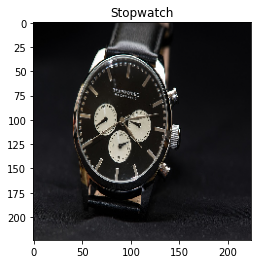

In [29]:
plt.imshow(sample_img)
predict_class_name  = imagenet_labels[predict_class]
plt.title(predict_class_name.title());

In [32]:
def predict_mobilenet(path, model):
    
    sample_img = tf.keras.preprocessing.image.load_img(path, 
                                               target_size=(224,224))
    sample_img = np.array(sample_img) / 255.0
    
   
    predict_class = model.predict(np.expand_dims(sample_img, axis=0))
    
    predict_class = model.predict(np.expand_dims(sample_img, axis=0))

    URL_IMAGENET_LABELS = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
    label_path = tf.keras.utils.get_file('ImageNetLabels.txt', URL_IMAGENET_LABELS)
    
    predict_class = np.argmax(predict_class)
    
    imagenet_labels = np.array(open(label_path).read().splitlines())
    
    plt.imshow(sample_img)
    predict_class_name  = imagenet_labels[predict_class]
    plt.title(predict_class_name.title());

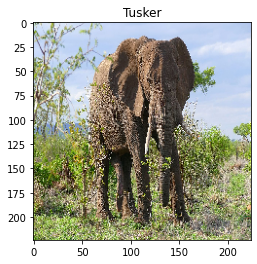

In [33]:
predict_mobilenet('datasets/Transfer Learning Data/African_Elephant.jpg', trained_mobilenet)

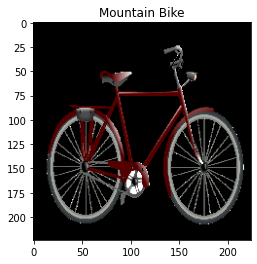

In [35]:
predict_mobilenet('datasets/Transfer Learning Data/bicycle.png', trained_mobilenet)

### Transfer Learning

In [39]:
FLOWERS_DATA_URL = tf.keras.utils.get_file('flower_photos',
                                           'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                            untar=True)

In [44]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

flowers_data = image_generator.flow_from_directory(str(FLOWERS_DATA_URL),
                                                  target_size=(224,224),
                                                  batch_size=64,
                                                  shuffle=True)

Found 3670 images belonging to 5 classes.


In [53]:
for flower_data_input_batch, flower_data_label_batch in flowers_data:
    print('Image batch shape', flow_data_input_batch.shape)
    print('Label batch shape', flower_data_label_batch.shape)
    break

Image batch shape (64, 224, 224, 3)
Label batch shape (64, 5)


In [61]:
predict_batch = trained_mobilenet.predict(flower_data_input_batch)
predict_batch.shape

(64, 1001)

In [62]:
predict_classname = imagenet_labels[np.argmax(predict_batch, axis=-1)]

predict_classname

array(['daisy', 'daisy', 'daisy', 'streetcar', 'ear', 'picket fence',
       'daisy', 'sea anemone', 'Bedlington terrier', 'cardoon',
       'Bedlington terrier', 'daisy', 'hip', 'coral fungus', 'spider web',
       'daisy', 'picket fence', 'porcupine', 'bee', 'porcupine', 'daisy',
       'goblet', 'hamper', 'daisy', 'bee', 'buckeye', 'daisy', 'lipstick',
       'daisy', 'pinwheel', 'vase', 'daisy', 'pot', 'bee', 'daisy',
       'daisy', 'coral fungus', 'daisy', 'artichoke', 'daisy',
       'picket fence', 'coral fungus', 'coral fungus', 'feather boa',
       'pinwheel', 'picket fence', 'orange', 'bell pepper', 'rapeseed',
       'jackfruit', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'ant',
       'bee', 'spider web', 'bee', 'rapeseed', 'vase', 'daisy', 'bonnet',
       'daisy'], dtype='<U30')

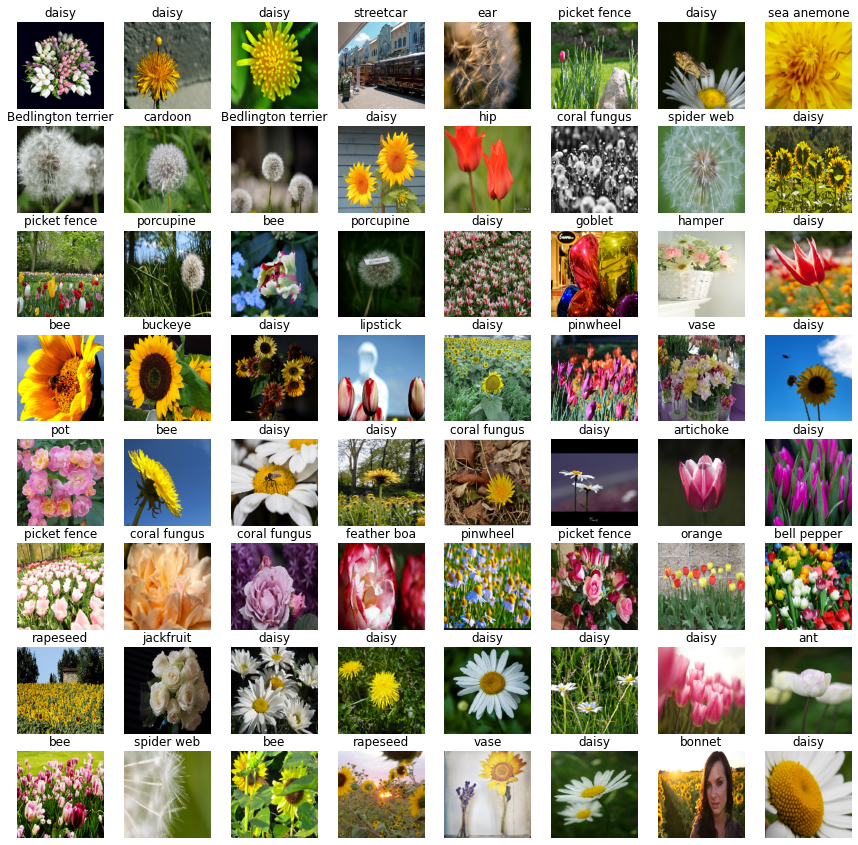

In [65]:
plt.figure(figsize=(15,15))
for n in range(64):
    plt.subplot(8,8,n+1)
    plt.imshow(flower_data_input_batch[n])
    plt.title(predict_classname[n])
    plt.axis('off')